In [1]:
import numpy, pandas, yfinance, matplotlib
print(numpy.__version__)

2.4.2


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib . pyplot as plt
# Atsisiunciame duomenis ( pvz . NVDA ir BTC )
data = yf . download (['NVDA','BTC-USD'] , start ='2024-01-01') ['Close']
returns = data . pct_change () . dropna ()

[*********************100%***********************]  2 of 2 completed


In [3]:
print(returns)
print()
print(returns.mean())

Ticker       BTC-USD      NVDA
Date                          
2024-01-03 -0.046928 -0.012436
2024-01-04  0.031081  0.009019
2024-01-05 -0.000390  0.022897
2024-01-09 -0.017687  0.016975
2024-01-10  0.010578  0.022770
...              ...       ...
2026-02-12 -0.011496 -0.016364
2026-02-13  0.039806 -0.022093
2026-02-18 -0.015837  0.016273
2026-02-19  0.008012 -0.000426
2026-02-20  0.015650  0.010218

[414 rows x 2 columns]

Ticker
BTC-USD    0.000438
NVDA       0.003327
dtype: float64


In [4]:
mu = returns ['NVDA'].mean ()
sigma = returns ['NVDA'].std ()
var_95_param = mu-1.645 * sigma
print ( f"NVDA Parametrinis VaR (95%) : { var_95_param :.4f} " )

NVDA Parametrinis VaR (95%) : -0.0481 


In [5]:
var_99_param = mu-2.326 * sigma
print ( f"NVDA Parametrinis VaR (99%) : { var_99_param :.4f} " )

NVDA Parametrinis VaR (99%) : -0.0694 


In [6]:
var_95_hist = np . percentile ( returns ['NVDA'] , 5)
print ( f"NVDA Istorinis VaR (95%) : { var_95_hist :.4f} " )

NVDA Istorinis VaR (95%) : -0.0421 


In [7]:
# Filtruojame grazas , kurios yra mazesnes uz VaR
tail_losses = returns ['NVDA'][ returns ['NVDA'] <= var_95_hist ]
es_95 = tail_losses . mean ()
print (f"NVDA Expected Shortfall (95%) : { es_95 :.4f} " )

NVDA Expected Shortfall (95%) : -0.0631 


In [8]:
daily_std = returns ['NVDA']. std ()
annual_std = daily_std * np . sqrt (252) # Akcijoms 252 d .
print (f"NVDA Metinis volatilumas : { annual_std :.2%} " )

NVDA Metinis volatilumas : 49.66% 


In [9]:
# Paliekame tik tas dienas , kai abu aktyvai turejo kaina
synced_returns = returns . dropna ()
print (f"Eiluciu skaicius po sync : { len ( synced_returns ) } " )

Eiluciu skaicius po sync : 414 


In [10]:
corr_matrix = synced_returns . corr ()
print ( corr_matrix )

Ticker    BTC-USD      NVDA
Ticker                     
BTC-USD  1.000000  0.240803
NVDA     0.240803  1.000000


In [11]:
cov_matrix = synced_returns . cov ()
print ( cov_matrix )

Ticker    BTC-USD      NVDA
Ticker                     
BTC-USD  0.000813  0.000215
NVDA     0.000215  0.000979


In [12]:
weights = np . array ([0.6 , 0.4])
# Patikriname , ar suma lygi 1
print (f"Svoris is viso : { np . sum ( weights ) } " )

Svoris is viso : 1.0 


In [13]:
portfolio_var = np . dot ( weights .T , np . dot ( cov_matrix , weights ) )
portfolio_std = np . sqrt ( portfolio_var )
print (f"Portfelio paros rizika : { portfolio_std :.4f} " )

Portfelio paros rizika : 0.0235 


In [15]:
weighted_risk = ( weights [0] * returns ['NVDA']. std () +
weights [1] * returns ['BTC-USD']. std () )
benefit = weighted_risk-portfolio_std
print (f"Diversifikacijos nauda : { benefit :.4f} " )

Diversifikacijos nauda : 0.0067 


In [16]:
exceptions = returns ['NVDA'][ returns ['NVDA'] < var_95_hist ]
count = len ( exceptions )
total = len ( returns ['NVDA'])
print (f"Irasu : { total } , Isimciu : { count } , %: { count / total :.2%} " )

Irasu : 414 , Isimciu : 21 , %: 5.07% 


In [17]:
S0 = 100 # Pradine kaina
mu , sigma = 0.0001 , 0.02
Z = np . random . standard_normal (10000)
S_end = S0 * np . exp (( mu-0.5 * sigma **2) + sigma * Z )

In [18]:
simulated_returns = ( S_end-S0 ) / S0
mc_var_95 = np . percentile ( simulated_returns , 5)
print (f"Monte Carlo VaR (95%) : { mc_var_95 :.4f} " )

Monte Carlo VaR (95%) : -0.0328 


Text(0.5, 1.0, ' NVDA ir BTC 30 d . Rolling Correlation ')

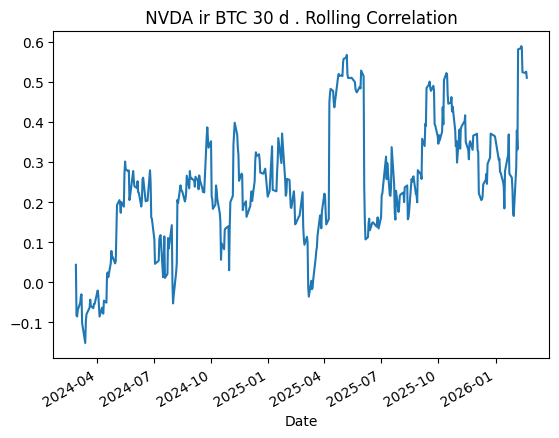

In [19]:
rolling_corr = returns ['NVDA']. rolling (30) . corr ( returns ['BTC-USD'])
rolling_corr . plot ()
plt . title ( " NVDA ir BTC 30 d . Rolling Correlation " )

In [20]:
log_returns = np . log ( data / data . shift (1) ) . dropna ()
print ( log_returns . head () )

Ticker       BTC-USD      NVDA
Date                          
2024-01-03 -0.048065 -0.012514
2024-01-04  0.030607  0.008978
2024-01-05 -0.000390  0.022639
2024-01-09 -0.017845  0.016833
2024-01-10  0.010522  0.022515


In [21]:
from scipy import stats
kurtosis = stats . kurtosis ( returns ['NVDA'])
print (f"Ekscesas ( Kurtosis ) : { kurtosis :.2f} " )

Ekscesas ( Kurtosis ) : 4.76 


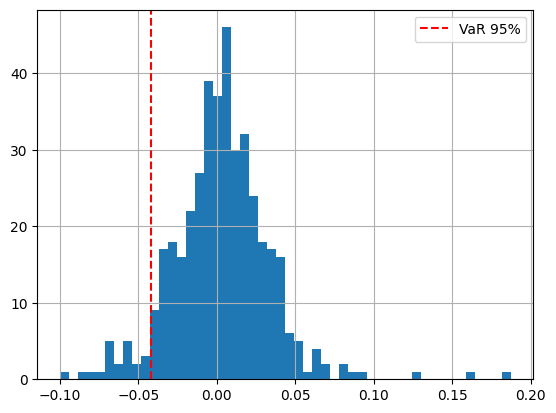

In [22]:
returns ['NVDA']. hist ( bins =50)
plt . axvline ( var_95_hist , color ='red', linestyle ='--', label ='VaR 95%')
plt . legend ()

In [23]:
worst_day = returns ['NVDA']. min ()
portfolio_loss = 1000000 * worst_day # Nuostolis nuo 1 mln .
print (f"Nuostolis per juodziausia diena : { portfolio_loss :.0f} EUR " )

Nuostolis per juodziausia diena : -100046 EUR 
